In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
%load_ext autoreload
%autoreload 2

In [2]:
%run proj1_helpers.py
%run implementations.py

In [3]:
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Spliting the data

In [4]:
ratio_train_test = 0.9
x_train, y_train, x_test, y_test = split_data(tX, y, ratio_train_test, seed=1)

## Cleaning the data
We see that the column 22 can be used to make categories, since the values of some other columns seems to be proportional to the value of this column.

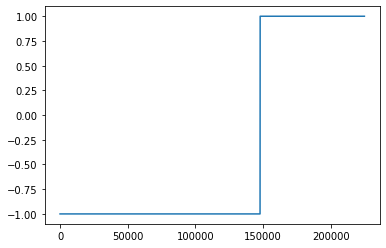

In [5]:
# categorical column
plt.plot(np.sort(y_train))

In [6]:
# preprocessing training dataset
categorical_datasets = preprocessing(copy.deepcopy(y_train),copy.deepcopy(x_train))
y0, x0 = categorical_datasets[0]
y1, x1 = categorical_datasets[1]
y2, x2 = categorical_datasets[2]
columns_to_keep = categorical_datasets[3]

# clean high correlation areas
#x0
x0 = np.delete(x0, 6, 1)
x0 = np.delete(x0, 6, 1)
#x1
x1 = np.delete(x1, 4, 1)
x1 = np.delete(x1, 18, 1)
x1 = np.delete(x1, 6, 1)
x1 = np.delete(x1, 3, 1)
#x2
x2 = np.delete(x2, 10, 1)
x2 = np.delete(x2, 21, 1)
x2 = np.delete(x2, 4, 1)
x2 = np.delete(x2, 6, 1)
x2 = np.delete(x2, 3, 1)
x2 = np.delete(x2, 4, 1)
x2 = np.delete(x2, 18, 1)

# preprocessing
categorical_datasets_test = preprocessing(_,copy.deepcopy(x_test), train = False, columns_to_keep = columns_to_keep)
x0_test = categorical_datasets_test[0]
x1_test = categorical_datasets_test[1]
x2_test = categorical_datasets_test[2]

rows_to_keep0 = categorical_datasets_test[3]
rows_to_keep1 = categorical_datasets_test[4]
rows_to_keep2 = categorical_datasets_test[5]


y0_test = y_test[np.where(rows_to_keep0)]
y1_test = y_test[np.where(rows_to_keep1)]
y2_test = y_test[np.where(rows_to_keep2)]

# clean high correlation areas
#x0
x0_test = np.delete(x0_test, 6, 1)
x0_test = np.delete(x0_test, 6, 1)
#x1
x1_test = np.delete(x1_test, 4, 1)
x1_test = np.delete(x1_test, 18, 1)
x1_test = np.delete(x1_test, 6, 1)
x1_test = np.delete(x1_test, 3, 1)
#x2
x2_test = np.delete(x2_test, 10, 1)
x2_test = np.delete(x2_test, 21, 1)
x2_test = np.delete(x2_test, 4, 1)
x2_test = np.delete(x2_test, 6, 1)
x2_test = np.delete(x2_test, 3, 1)
x2_test = np.delete(x2_test, 4, 1)
x2_test = np.delete(x2_test, 18, 1)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:959: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [7]:
import pandas as pd
x0_df=pd.DataFrame(data=x0[0:,0:], index=[i for i in range(x0.shape[0])], columns=['f'+str(i) for i in range(x0.shape[1])])
x1_df=pd.DataFrame(data=x1[0:,0:], index=[i for i in range(x1.shape[0])], columns=['f'+str(i) for i in range(x1.shape[1])])
x2_df=pd.DataFrame(data=x2[0:,0:], index=[i for i in range(x2.shape[0])], columns=['f'+str(i) for i in range(x2.shape[1])])

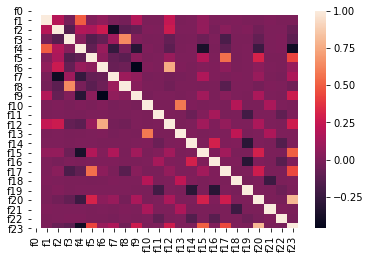

In [8]:
import seaborn as sns
# calculate the correlation matrix
corr = x2_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

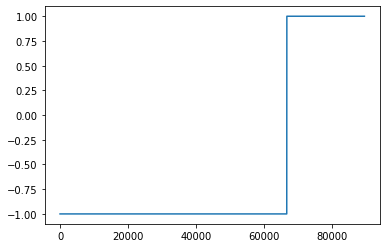

In [9]:
plt.plot(np.sort(y0))

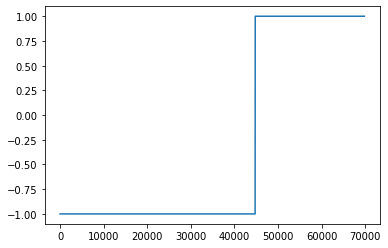

In [10]:
plt.plot(np.sort(y1))

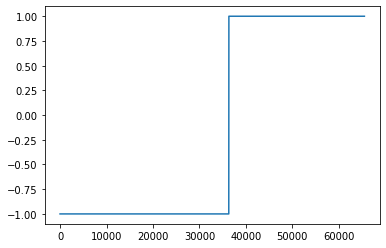

In [11]:
plt.plot(np.sort(y2))

In [12]:
print(x0.shape)
print(x1.shape)
print(x2.shape)

(89647, 17)
(69837, 19)
(65516, 24)


## Grid search on poly degrees and lambdas

In [23]:
%run implementations.py

In [54]:
## Set hyperparameters
lambdas0 = np.logspace(-4, 4, 120)
lambdas1 = np.logspace(-4, 4, 120)
lambdas2 = np.logspace(-4, 4, 120)

degrees0 = [i for i in range(4,7)]
degrees1 = [i for i in range(7,10)]
degrees2 = [i for i in range(9,12)]

In [55]:
def grid_search_ridge_regression(y_train,x_train,y_test,x_test,lambdas,degrees):
    # define lists to store the loss of training data and test data
    data = []
    for degree in degrees:
        data_nested = []        
        phi_x_train = build_poly(x_train, degree)
        phi_x_test = build_poly(x_test, degree)
        for lambda_ in lambdas:
            w = ridge_regression(y_train,phi_x_train,lambda_)[1]
            y_pred_train = predict_labels(w, phi_x_train)
            acc_train,_ = metrics(y_train,y_pred_train)
            y_pred_test = predict_labels(w, phi_x_test)
            acc_test,_ = metrics(y_test,y_pred_test)
            data_nested.append([acc_train, acc_test, degree, lambda_, w])
        data_nested = np.array(data_nested)
        index_best_value = np.where(data_nested[:,1] == np.amax(data_nested[:,1]))
        best_value = data_nested[index_best_value][0]
        print("Running :: Training accuracy: ",best_value[0]," ,testing accuracy: ",best_value[1]," ,degree: ",best_value[2]," , lambda : ",best_value[3])
        data.append(best_value)
    data = np.array(data)
    index_best_value = np.where(data[:,1] == np.amax(data[:,1]))
    best_value = data[index_best_value][0]
    acc_train, acc_test, degree, lambda_, w = best_value[0], best_value[1], best_value[2], best_value[3], best_value[4]
    print("Final :: Training accuracy: ",acc_train," ,testing accuracy: ",acc_test," ,degree: ",degree," , lambda : ",lambda_)
    
    return degree, lambda_, w

In [50]:
degree0, lambda0, w0 = grid_search_ridge_regression(y0, x0, y0_test, x0_test, lambdas0, degrees0)

Running :: Training accuracy:  0.8415674813434917  ,testing accuracy:  0.8437736771355249  ,degree:  4  , lambda :  387.4675120456128
Running :: Training accuracy:  0.8424375606545673  ,testing accuracy:  0.844702431870952  ,degree:  5  , lambda :  96.2040327106476
Running :: Training accuracy:  0.747576606021395  ,testing accuracy:  0.7472320664792863  ,degree:  6  , lambda :  284.30304593026653
Final :: Training accuracy:  0.8424375606545673  ,testing accuracy:  0.844702431870952  ,degree:  5  , lambda :  96.2040327106476


In [56]:
degree1, lambda1, w1 = grid_search_ridge_regression(y1, x1, y1_test, x1_test, lambdas1, degrees1)

Running :: Training accuracy:  0.808310780818191  ,testing accuracy:  0.8060451013833617  ,degree:  7  , lambda :  5.930744895010559
Running :: Training accuracy:  0.8096710912553517  ,testing accuracy:  0.806518855410271  ,degree:  8  , lambda :  0.00011674193588234588
Running :: Training accuracy:  0.8093990291679196  ,testing accuracy:  0.8064556882066831  ,degree:  9  , lambda :  5.930744895010559
Final :: Training accuracy:  0.8096710912553517  ,testing accuracy:  0.806518855410271  ,degree:  8  , lambda :  0.00011674193588234588


In [57]:
degree2, lambda2, w2 = grid_search_ridge_regression(y2, x2, y2_test, x2_test, lambdas2, degrees2)

Running :: Training accuracy:  0.8428170217962024  ,testing accuracy:  0.836309220147604  ,degree:  9  , lambda :  60.46619009070436
Running :: Training accuracy:  0.842893339031687  ,testing accuracy:  0.8365132809577254  ,degree:  10  , lambda :  96.2040327106476
Running :: Training accuracy:  0.8423438549361988  ,testing accuracy:  0.8364112505526647  ,degree:  11  , lambda :  7337.467970651373
Final :: Training accuracy:  0.842893339031687  ,testing accuracy:  0.8365132809577254  ,degree:  10  , lambda :  96.2040327106476


## Test on the validate dataset

In [58]:
# Build poly features
phi_x0_test = build_poly(copy.deepcopy(x0_test), degree0)
phi_x1_test = build_poly(copy.deepcopy(x1_test), degree1)
phi_x2_test = build_poly(copy.deepcopy(x2_test), degree2)

# Predict outcomes
y_pred0 = predict_labels(w0, phi_x0_test)
y_pred1 = predict_labels(w1, phi_x1_test)
y_pred2 = predict_labels(w2, phi_x2_test)

total_length = y_pred0.shape[0] + y_pred1.shape[0] + y_pred2.shape[0]
y_pred = np.zeros((total_length,))
y_pred[np.where(rows_to_keep0)] = y_pred0
y_pred[np.where(rows_to_keep1)] = y_pred1
y_pred[np.where(rows_to_keep2)] = y_pred2


In [59]:
cat_accuracy_test, f1_score_test = metrics(y_test,y_pred)
print("Categorical accuracy test : ",cat_accuracy_test," || f1_score test: ",f1_score_test)

Categorical accuracy test :  0.8304863698764464  || f1_score test:  0.39391457729620766


## Gradient descent with the preheated weights

In [36]:
max_iters = 1000
learning_rate0 = 0.0001
learning_rate1 = 0.0000000001
learning_rate2 = 0.0001

In [42]:
def ridge_regression_SGD(y_train, x_train, y_test, x_test, initial_w, max_iters, gamma, lambda_, degree):
    ws = copy.deepcopy(initial_w)
    N = y_train.shape[0]
    phi_x_train = build_poly(x_train, degree)
    phi_x_test = build_poly(x_test, degree)
    for i in range(max_iters):
        for n in range(N):
            rand_ind = np.random.randint(0, N)
            grad = compute_gradient_mse(y_train[rand_ind], phi_x_train[rand_ind], ws) + 2*lambda_*ws
            ws = ws - gamma*grad
        y_pred_train = predict_labels(ws, phi_x_train)
        acc_train,_ = metrics(y_train,y_pred_train)
        y_pred_test = predict_labels(ws, phi_x_test)
        acc_test,_ = metrics(y_test,y_pred_test)
        if (i%10 ==0):
            print("Step {} :: acc_train: {}, acc_test: {}".format(i,acc_train,acc_test))
        

    loss = compute_loss(y_train, phi_x_train, ws)+ lambda_*np.dot(ws.T,ws)

    return loss, ws

In [43]:
w0_SGD = ridge_regression_SGD(y0, x0, y0_test, x0_test, w0, max_iters, learning_rate0, lambda0, degree0)[1]

Step 0 :: acc_train: 0.7448325097326179, acc_test: 0.7447390932420872
Step 10 :: acc_train: 0.7448325097326179, acc_test: 0.7447390932420872


KeyboardInterrupt: 

In [30]:
w1_GD = ridge_regression_SGD(y1, x1, y1_test, x1_test, w1, max_iters, learning_rate1, lambda1, degree1)[1]

NameError: name 'w1' is not defined

In [217]:
w2_GD = ridge_regression_GD(y2, x2, y2_test, x2_test, w2, max_iters, learning_rate2, lambda2, degree2)[1]

Step 0 :: acc_train: 0.7860827889370535, acc_test: 0.7769615345372921
Step 10 :: acc_train: 0.44561633799377254, acc_test: 0.4487977417270347
Step 20 :: acc_train: 0.44561633799377254, acc_test: 0.4487977417270347


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


KeyboardInterrupt: 

## Test the GD version

In [155]:
# Predict outcomes
y_pred0_GD = predict_labels(w0, phi_x0_test)
y_pred1_GD = predict_labels(w1, phi_x1_test)
y_pred2_GD = predict_labels(w2, phi_x2_test)

total_length = y_pred0_GD.shape[0] + y_pred1_GD.shape[0] + y_pred2_GD.shape[0]
y_pred_GD = np.zeros((total_length,))
y_pred_GD[np.where(rows_to_keep0)] = y_pred0_GD
y_pred_GD[np.where(rows_to_keep1)] = y_pred1_GD
y_pred_GD[np.where(rows_to_keep2)] = y_pred2_GD

In [156]:
cat_accuracy_test, f1_score_test = metrics_check(y_test,y_pred_GD)
print("Categorical accuracy test : ",cat_accuracy_test," || f1_score test: ",f1_score_test)

Categorical accuracy test :  0.8135614826436556  || f1_score test:  0.36176706827309235


## Neural Network

In [23]:
def Poly_Neural_Net(y_train, x_train,y_test, x_test, degree, eps):
    # define lists to store the loss of training data and test data
    
    phi_x_train = build_poly(x_train, degree)
    phi_x_test = build_poly(x_test, degree)
    y_train = np.where(y_train==-1, 0, y_train)
    y_test = np.where(y_test==-1, 0, y_test)
        
    labels = [0, 1]
    layer_array = [[len(labels), 'sigmoid']]
    input_dims = phi_x_train.shape[1]
    neural_net = create_neural_network(layer_array, input_dims)
    neural_net = train_network(phi_x_train, y_train, labels, neural_net, epochs=eps)
    
    y_pred_train = []
    for i in range(len(y_train)):
        y_pred_train.append((predict(phi_x_train[i], neural_net))[0])
    
    y_pred_test = []
    for i in range(len(y_test)):
        y_pred_test.append((predict(phi_x_test[i], neural_net))[0])
        
    y_pred_train = np.where(y_pred_train==0, -1, y_pred_train)
    y_pred_test = np.where(y_pred_test==0, -1, y_pred_test)
    
    acc_train,_ = metrics_check(y_train,y_pred_train)
    acc_test,_ = metrics_check(y_test,y_pred_test)
    
    data = []
    data_nested = []        
        
    data_nested.append([acc_train, acc_test, degree])
    data_nested = np.array(data_nested)
    index_best_value = np.where(data_nested[:,1] == np.amax(data_nested[:,1]))
    best_value = data_nested[index_best_value][0]
    print("Running :: Training accuracy: ",best_value[0]," ,testing accuracy: ",best_value[1])
    data.append(best_value)
        
    data = np.array(data)
    index_best_value = np.where(data[:,1] == np.amax(data[:,1]))
    best_value = data[index_best_value][0]
    acc_train, acc_test = best_value[0], best_value[1]
    print("Final :: Training accuracy: ",acc_train," ,testing accuracy: ",acc_test)
    
    return degree


In [26]:
degree = 3
epochs=50

degree0 = Poly_Neural_Net(y0, x0, y0_test, x0_test, degree, epochs)

Running :: Training accuracy:  0.845215121532232  ,testing accuracy:  0.845362336551387
Final :: Training accuracy:  0.845215121532232  ,testing accuracy:  0.845362336551387


In [34]:
degree = 3
epochs= 200

degree0 = Poly_Neural_Net(y1, x1, y1_test, x1_test, degree, epochs)

Running :: Training accuracy:  0.8116471211535432  ,testing accuracy:  0.8025393215842335
Final :: Training accuracy:  0.8116471211535432  ,testing accuracy:  0.8025393215842335


In [33]:
degree = 8
epochs=150

degree0 = Poly_Neural_Net(y2, x2, y2_test, x2_test, degree, epochs)

KeyboardInterrupt: 

## Generate predictions and save ouput in csv format for submission:

In [60]:
DATA_TEST_PATH = 'test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [61]:
# preprocessing
categorical_datasets_test = preprocessing(_,copy.deepcopy(tX_test), train = False, columns_to_keep = columns_to_keep)
x0_validate = categorical_datasets_test[0]
x1_validate = categorical_datasets_test[1]
x2_validate = categorical_datasets_test[2]
rows_to_keep_validate0 = categorical_datasets_test[3]
rows_to_keep_validate1 = categorical_datasets_test[4]
rows_to_keep_validate2 = categorical_datasets_test[5]

# clean high correlation areas
#x0
x0_validate = np.delete(x0_validate, 6, 1)
x0_validate = np.delete(x0_validate, 6, 1)
#x1
x1_validate = np.delete(x1_validate, 4, 1)
x1_validate = np.delete(x1_validate, 18, 1)
x1_validate = np.delete(x1_validate, 6, 1)
x1_validate = np.delete(x1_validate, 3, 1)
#x2
x2_validate = np.delete(x2_validate, 10, 1)
x2_validate = np.delete(x2_validate, 21, 1)
x2_validate = np.delete(x2_validate, 4, 1)
x2_validate = np.delete(x2_validate, 6, 1)
x2_validate = np.delete(x2_validate, 3, 1)
x2_validate = np.delete(x2_validate, 4, 1)
x2_validate = np.delete(x2_validate, 18, 1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:959: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [62]:
print(x0_validate.shape)
print(x1_validate.shape)
print(x2_validate.shape)

(227458, 17)
(175338, 19)
(165442, 24)


In [63]:
# Build poly features
phi_x0_validate = build_poly(copy.deepcopy(x0_validate), degree0)
phi_x1_validate = build_poly(copy.deepcopy(x1_validate), degree1)
phi_x2_validate = build_poly(copy.deepcopy(x2_validate), degree2)

In [64]:
# Predict outcomes
y_pred0 = predict_labels(w0, phi_x0_validate)
y_pred1 = predict_labels(w1, phi_x1_validate)
y_pred2 = predict_labels(w2, phi_x2_validate)

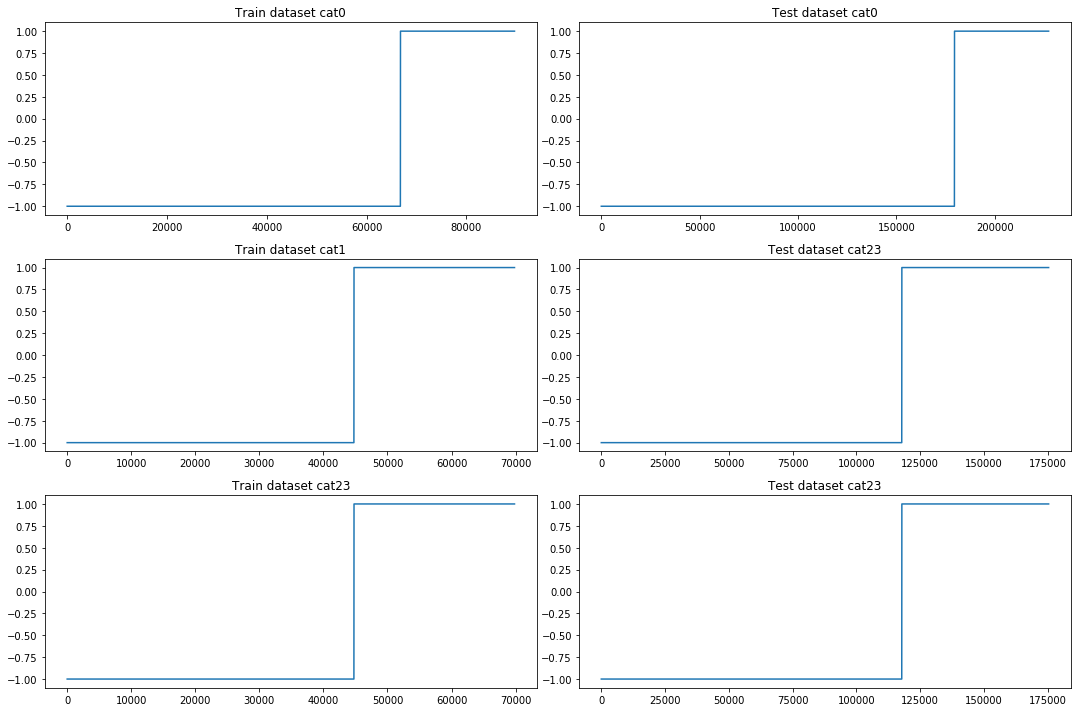

In [65]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

# Cat 0
ax1.plot(np.sort(y0))
ax1.title.set_text("Train dataset cat0")
ax2.plot(np.sort(y_pred0))
ax2.title.set_text("Test dataset cat0")

# Cat 1
ax3.plot(np.sort(y1))
ax3.title.set_text("Train dataset cat1")
ax4.plot(np.sort(y_pred1))
ax4.title.set_text("Test dataset cat23")

# Cat 2 and 3
ax5.plot(np.sort(y1))
ax5.title.set_text("Train dataset cat23")
ax6.plot(np.sort(y_pred1))
ax6.title.set_text("Test dataset cat23")

plt.tight_layout()  # Optional ... often improves the layout 

In [66]:
total_length = y_pred0.shape[0] + y_pred1.shape[0] + y_pred2.shape[0]
y_pred = np.zeros((total_length,))
y_pred[np.where(rows_to_keep_validate0)] = y_pred0
y_pred[np.where(rows_to_keep_validate1)] = y_pred1
y_pred[np.where(rows_to_keep_validate2)] = y_pred2

In [67]:
total_length

568238

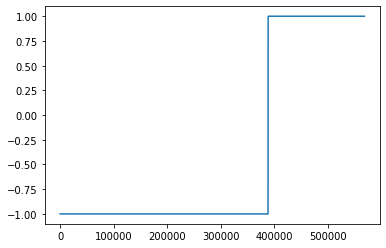

In [68]:
plt.plot(np.sort(y_pred))

In [69]:
time_day = datetime.datetime.now().day
time_hour = datetime.datetime.now().hour
time_min = datetime.datetime.now().minute
time_second = datetime.datetime.now().second

time = str(time_day)+"-"+str(time_hour)+"-"+str(time_min)+"-"+str(time_second)

OUTPUT_PATH = 'submission'+"_"+str(time)+".csv"
#print(weights_LS.shape)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)